# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

Claro, aquí tienes la explicación en español:

Para entrenar un modelo de clustering KMeans en el conjunto de datos con 8 clusters y calcular el coeficiente de silueta del modelo, puedes seguir estos pasos:

1. Importa la clase KMeans del módulo `sklearn.cluster` de scikit-learn.
2. Inicializa una instancia del modelo KMeans con el número de clusters deseado, en este caso, 8. Puedes utilizar el siguiente código: `kmeans_model = KMeans(n_clusters=8)`.
3. Ajusta el modelo a tus datos utilizando el método `fit` y pasa el conjunto de datos como argumento. Por ejemplo, `kmeans_model.fit(datos)`.
4. Una vez que el modelo ha sido ajustado, puedes calcular el coeficiente de silueta utilizando la función `silhouette_score` del módulo `sklearn.metrics`. Esta función toma como argumentos tus datos y las etiquetas de cluster asignadas por el modelo KMeans. Puedes usar el siguiente código: `silhouette_score(datos, kmeans_model.labels_)`.
5. El resultado de la función `silhouette_score` te dará un valor entre -1 y 1. Un valor cercano a 1 indica que los puntos están bien asignados a sus respectivos clusters y que los clusters están bien separados entre sí. Un valor cercano a -1 indica una mala asignación de los puntos a los clusters y una superposición significativa entre los clusters.
6. Este valor del coeficiente de silueta te permitirá evaluar la calidad del modelo de clustering KMeans con 8 clusters en tus datos. Un coeficiente de silueta más alto se considera mejor, lo que indica una mejor estructura de clustering.

Recuerda que el coeficiente de silueta es solo una medida de evaluación, y es importante considerar otras métricas y técnicas de validación para obtener una evaluación más completa y precisa del rendimiento del modelo de clustering.

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Inicializar el modelo KMeans con 8 clusters
kmeans_model = KMeans(n_clusters=8)

# Ajustar el modelo a los datos
kmeans_model.fit(X)

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(X, kmeans_model.labels_)

# Imprimir el coeficiente de silueta
print("Coeficiente de Silueta:", silhouette_avg)


Coeficiente de Silueta: 0.54068247478576


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [6]:

# Inicializar el modelo KMeans con 5 clusters
kmeans_model = KMeans(n_clusters=5)

# Ajustar el modelo a los datos
kmeans_model.fit(X)

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(X, kmeans_model.labels_)

# Imprimir el coeficiente de silueta
print("Coeficiente de Silueta:", silhouette_avg)


Coeficiente de Silueta: 0.5489993239795675


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [7]:

# Inicializar el modelo KMeans con 5 clusters
kmeans_model = KMeans(n_clusters=3)

# Ajustar el modelo a los datos
kmeans_model.fit(X)

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(X, kmeans_model.labels_)

# Imprimir el coeficiente de silueta
print("Coeficiente de Silueta:", silhouette_avg)


Coeficiente de Silueta: 0.5711381937868838


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [10]:
#pip install yellowbrick


     -------------------------------------- 282.6/282.6 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


La curva del codo es una técnica utilizada para determinar el número óptimo de clusters en un algoritmo de clustering, como K-Means. Se basa en la variación de la métrica de evaluación en función del número de clusters.

En el gráfico de la curva del codo, el eje x representa el número de clusters y el eje y representa la métrica de evaluación. El objetivo es encontrar el punto en el que agregar más clusters ya no proporciona una mejora significativa en la métrica. Este punto suele verse como un "codo" en la curva, de ahí su nombre.

Al observar la curva del codo, debes buscar el número de clusters en el que el cambio en la métrica de evaluación disminuye significativamente. Esto indica que agregar más clusters no está aportando muchos beneficios adicionales en términos de la métrica seleccionada.

En el código proporcionado, se utiliza la biblioteca Yellowbrick para visualizar la curva del codo con las métricas de distorsión, silueta y calinski_harabaz. Puedes observar cómo varían estas métricas a medida que se aumenta el número de clusters. El objetivo es encontrar el número de clusters que muestra un cambio significativo en las métricas y representa una buena trade-off entre la calidad del clustering y la complejidad del modelo.

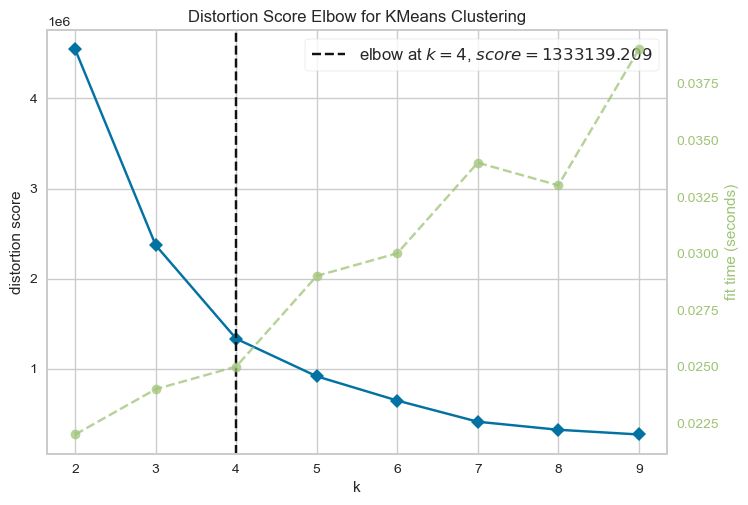

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Inicializar el modelo KMeans con un rango de posibles clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion')

# Ajustar el visualizador a los datos
visualizer.fit(X)

# Visualizar la curva del codo
visualizer.show()


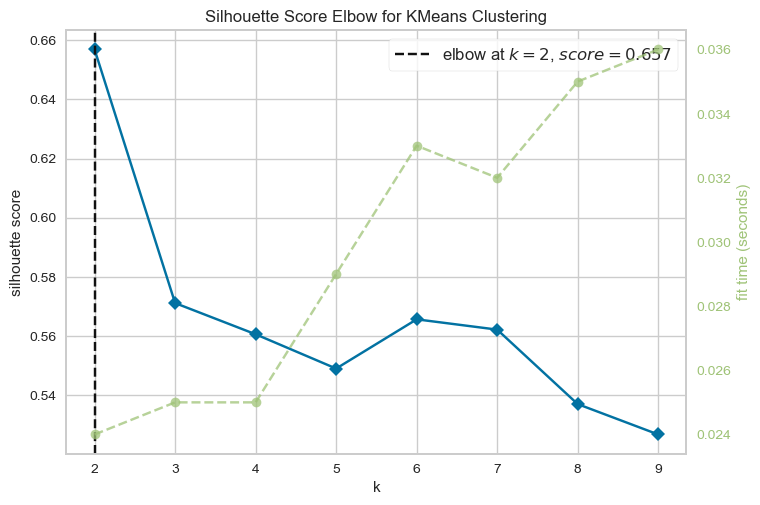

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [12]:
# Inicializar el modelo KMeans con un rango de posibles clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette')

# Ajustar el visualizador a los datos
visualizer.fit(X)

# Visualizar la curva del codo
visualizer.show()

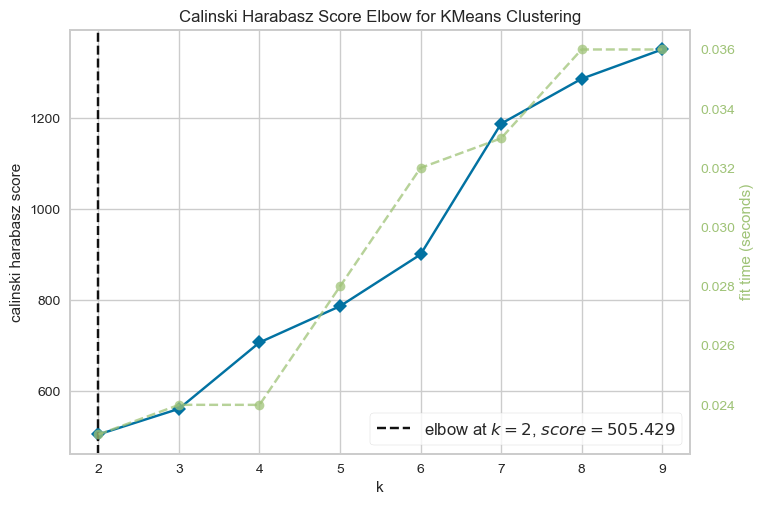

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [14]:
# Inicializar el modelo KMeans con un rango de posibles clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), metric='calinski_harabasz')

# Ajustar el visualizador a los datos
visualizer.fit(X)

# Visualizar la curva del codo
visualizer.show()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [15]:
#Importamos bibliotecas necesarias
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer


Utiliza la clase KElbowVisualizer de Yellowbrick para visualizar la curva del codo y evaluar diferentes métricas. Ajusta los parámetros k para especificar el rango de número de clusters y metric para seleccionar la métrica de evaluación deseada (por ejemplo, 'distortion', 'silhouette' o 'calinski_harabaz'):

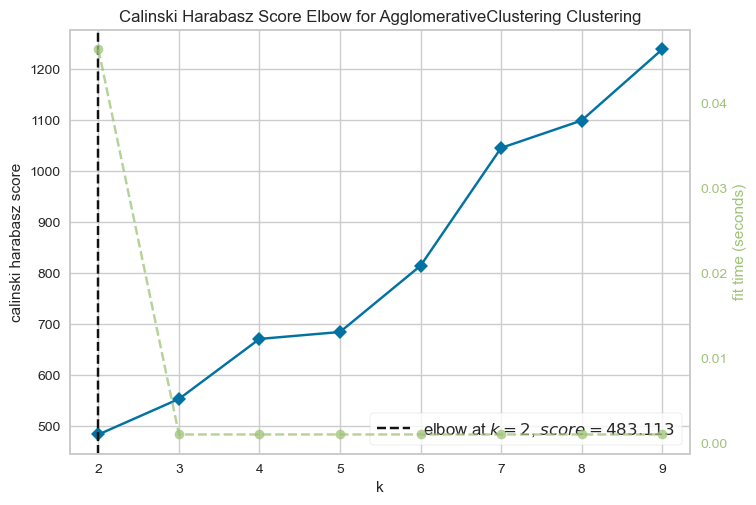

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [20]:
# Inicializar el modelo KMeans con un rango de posibles clusters
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2, 10), metric='calinski_harabasz')

# Ajustar el visualizador a los datos
visualizer.fit(X)

# Visualizar la curva del codo
visualizer.show()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

Para determinar el mejor modelo de clustering, puedes utilizar diferentes métricas y técnicas de evaluación. Algunas opciones comunes incluyen:

1. Métricas internas: Estas métricas evalúan la calidad de los clusters sin necesidad de tener información externa. Algunas métricas internas comunes son la suma de cuadrados dentro del cluster (WCSS), el coeficiente de silueta y el índice de Calinski-Harabasz. Puedes calcular estas métricas para diferentes modelos de clustering y comparar sus valores.

2. Métricas externas: Si tienes información externa sobre los datos, como etiquetas de clase verdaderas, puedes utilizar métricas externas para evaluar qué modelo se ajusta mejor a los datos. Por ejemplo, el puntaje de pureza, la puntuación Fowlkes-Mallows y el índice Rand son métricas externas comunes.

3. Evaluación visual: Además de las métricas, también puedes evaluar visualmente los resultados de clustering. Esto implica crear visualizaciones como gráficos de dispersión o gráficos de densidad para observar cómo se agrupan los datos y si los clusters tienen sentido desde un punto de vista intuitivo.

Es importante destacar que no existe una única "mejor" métrica o técnica de evaluación, ya que depende del problema y los datos específicos. Es recomendable probar diferentes métricas y técnicas, y considerar tanto los resultados numéricos como las observaciones visuales para tomar una decisión informada sobre el mejor modelo de clustering.

En el contexto del código anterior, puedes evaluar diferentes modelos de clustering utilizando métricas internas como el coeficiente de silueta o el índice de Calinski-Harabasz, y luego seleccionar el modelo con la mejor puntuación. Luego, puedes usar ese modelo seleccionado para crear y visualizar la matriz de dispersión según las instrucciones proporcionadas.

In [36]:
from sklearn import cluster, datasets

from sklearn.preprocessing import StandardScaler


In [37]:
X, _= datasets.make_blobs(n_samples=1500, centers=4, cluster_std=1.5)

In [38]:
kmeans=cluster.KMeans(n_clusters=4).fit(X)

In [39]:
y_pred=kmeans.predict(X)

y_pred[:10]

array([1, 2, 0, 3, 0, 1, 3, 1, 1, 0])

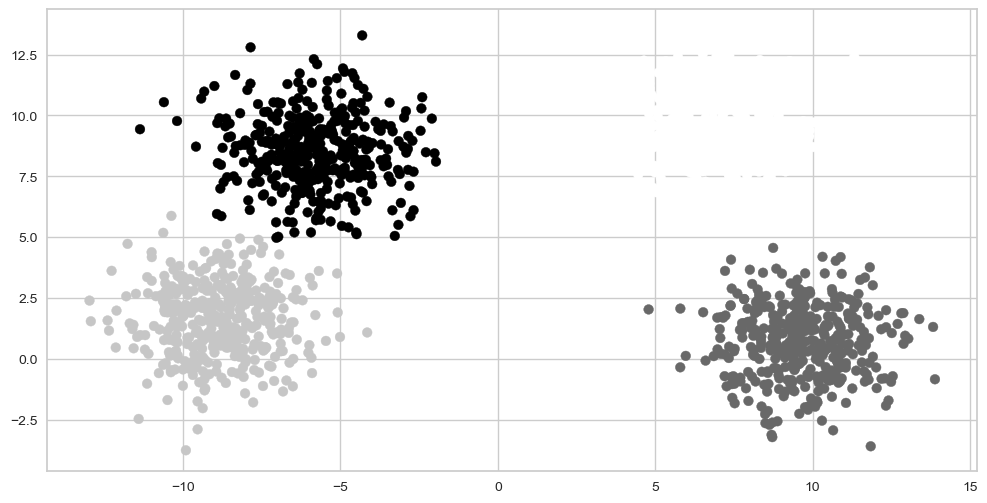

In [40]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y_pred);

In [42]:
centers=kmeans.cluster_centers_
centers

array([[ 6.94169766,  9.58476948],
       [-8.84230634,  1.65099816],
       [ 9.67848034,  0.65623239],
       [-5.83340669,  8.54893629]])

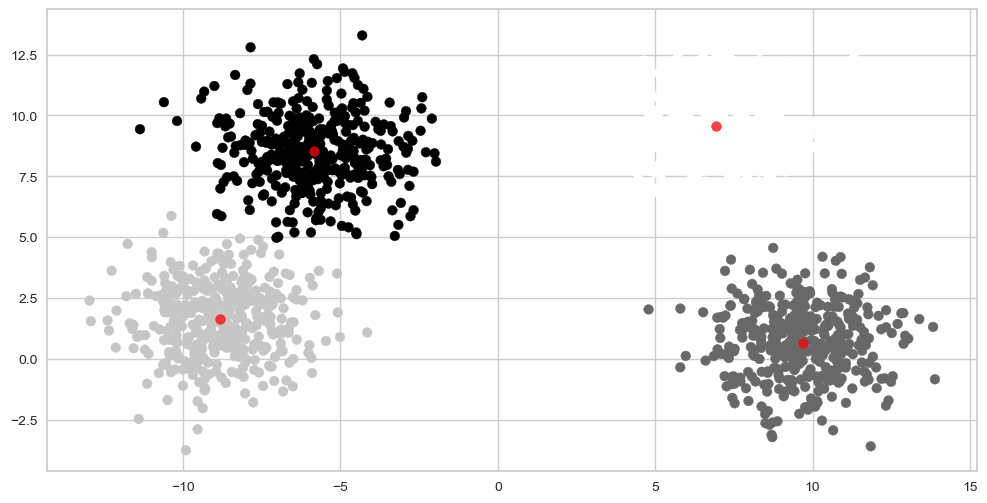

In [43]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y_pred)

plt.scatter(centers[:,0], centers[:,1], c='red', s=50, alpha=0.75);

In [44]:
from scipy.spatial.transform import Rotation as R

In [45]:
X, _= datasets.make_blobs(n_samples=1500, centers=4, cluster_std=1.)

X=np.c_[X, 0.5*np.random.randn(X.shape[0], 1)]

rot=R.from_euler('y', 45, degrees=True)

X=rot.apply(X)

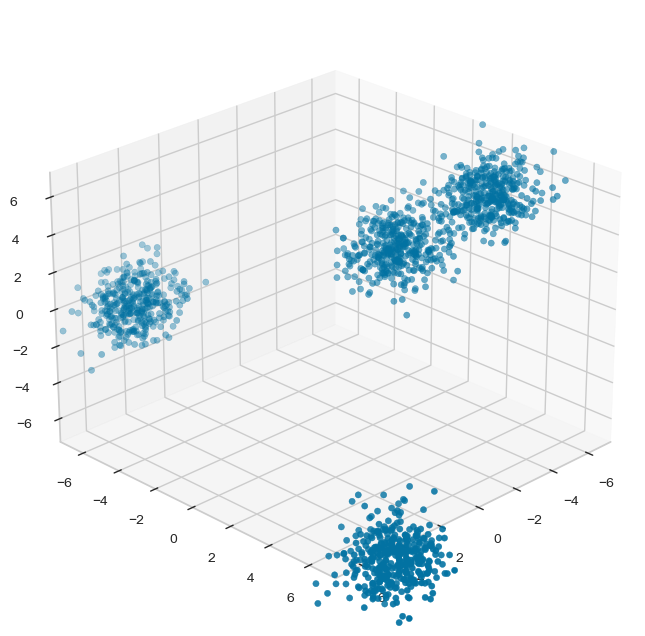

In [46]:
fig=plt.figure(figsize=(12, 8))

ax=fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.view_init(elev=25, azim=45)
plt.show();

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

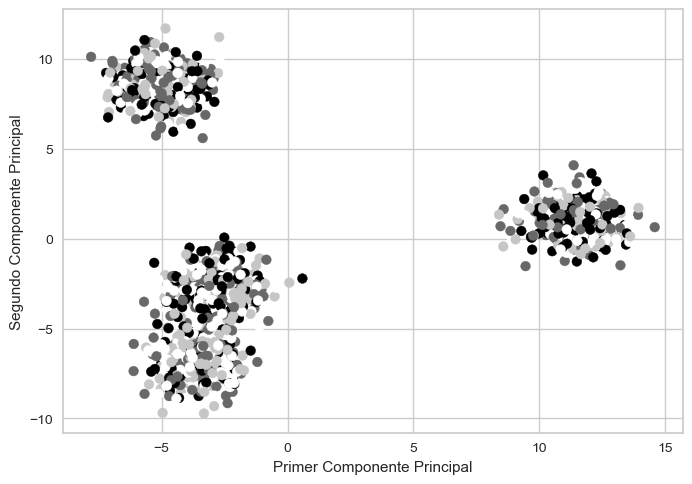

In [52]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Crea una instancia de la clase PCA
pca = PCA(n_components=2)

# Ajusta los datos a los componentes principales
principal_components = pca.fit_transform(X)

# Crea un gráfico de dispersión de los dos primeros componentes principales
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y_pred)

# Etiqueta los ejes x e y
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')

# Muestra el gráfico
plt.show()



## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

El t-SNE (t-Distributed Stochastic Neighbor Embedding) es un algoritmo de reducción de dimensionalidad no lineal ampliamente utilizado para visualizar conjuntos de datos de alta dimensionalidad en un espacio de menor dimensión

In [55]:
#importamos from sklearn.manifold import TSNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

c:\Users\GAMM\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\GAMM\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


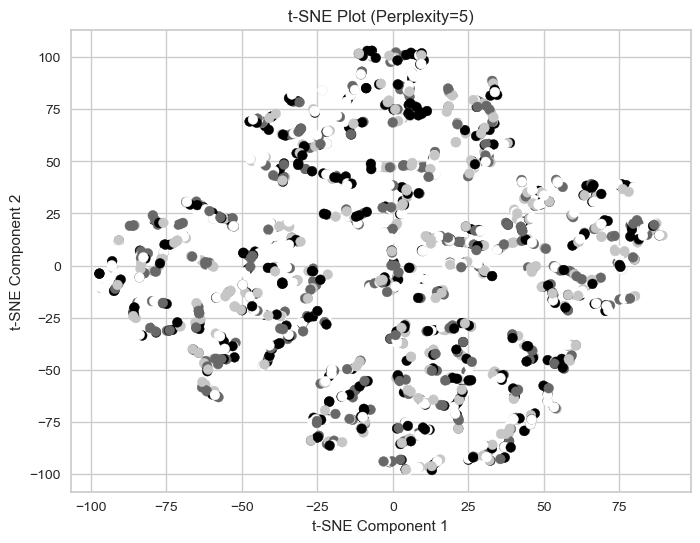

c:\Users\GAMM\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\GAMM\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


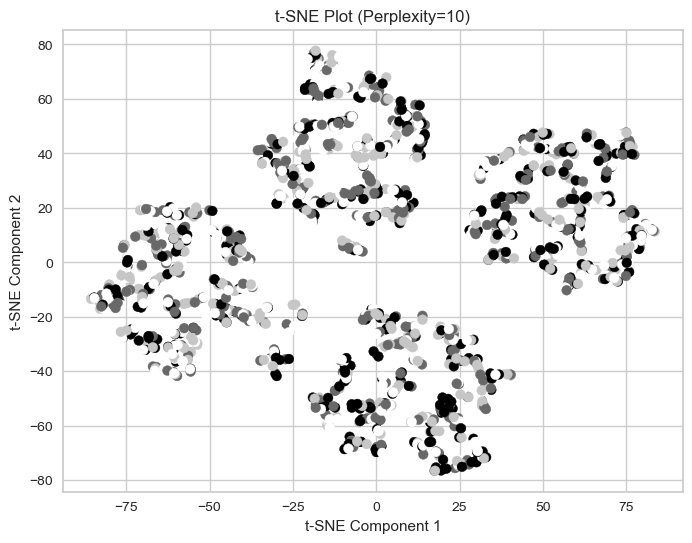

c:\Users\GAMM\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\GAMM\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


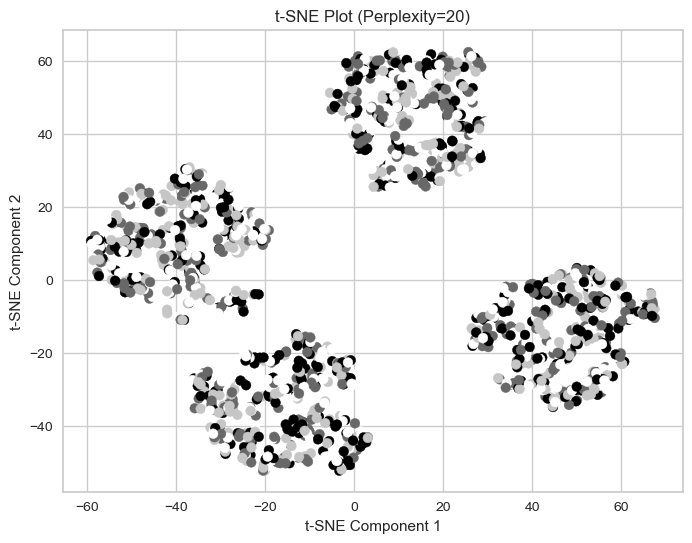

c:\Users\GAMM\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\GAMM\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


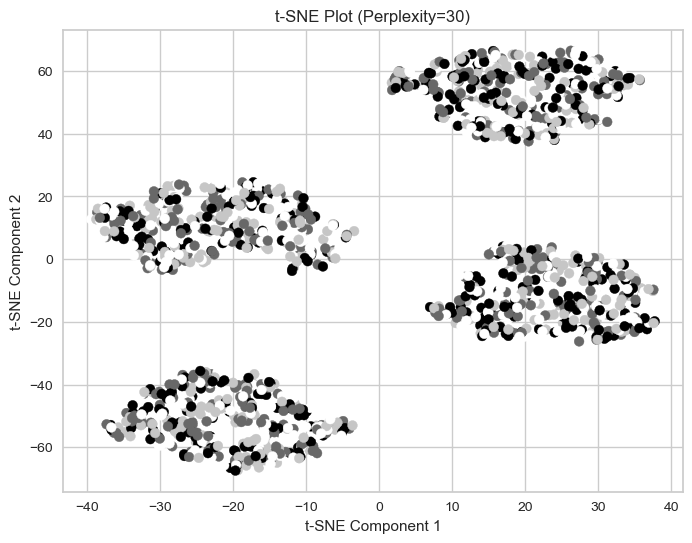

c:\Users\GAMM\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\GAMM\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


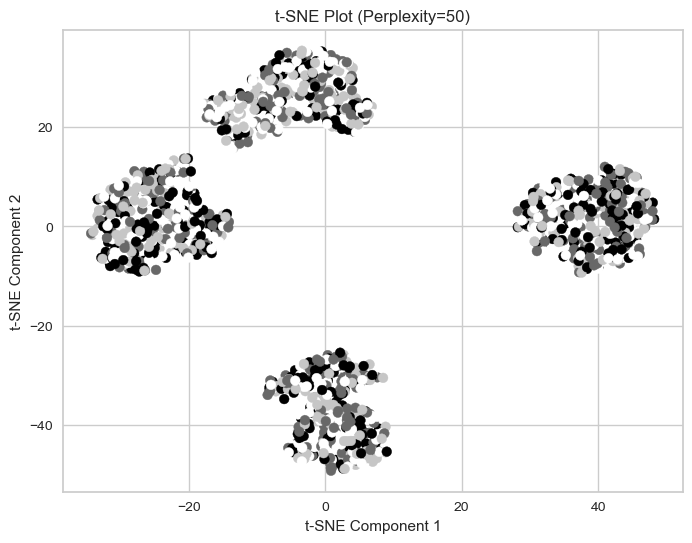

In [57]:
perplexities = [5, 10, 20, 30, 50]

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred)
    plt.title(f"t-SNE Plot (Perplexity={perplexity})")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()


En este código, se crea un objeto t-SNE con el número de componentes deseados y la perplejidad específica. Luego, se ajusta el modelo t-SNE a los datos de entrada X y se transforma a un espacio de menor dimensión (X_tsne). Finalmente, se traza el gráfico de dispersión t-SNE y se colorean los puntos según las etiquetas de cluster.

Ejecuta el código y observa los gráficos t-SNE generados para cada valor de perplejidad. Cada gráfico mostrará los clusters de manera visual en un espacio bidimensional.
Recuerda que la perplejidad controla el equilibrio entre la atención local y global en la proyección t-SNE. Experimenta con diferentes valores de perplejidad para ver cómo afecta la visualización de los clusters.

Nota: Asegúrate de tener las etiquetas de cluster (labels) disponibles para colorear los puntos en el gráfico t-SNE. Si no tienes estas etiquetas, deberás ejecutar un algoritmo de clustering previo para obtenerlas.